In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [5]:
path = r"C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Assignment-6\Consonants\\"
Label = {
    "ba" : 0,
    "bhA" : 1,
    "hI" : 2,
    "pa" : 3,
    "re" : 4
}

def normalize_list(numbers):
    min_val = min(numbers)
    max_val = max(numbers)
    normalized = [(x - min_val) / (max_val - min_val) for x in numbers]
    return normalized

Train = []
Train_Label = []
Test = []
Test_Label = []

for i in os.listdir(path):
    for j in os.listdir(path+i):
        for k in os.listdir(path+i+'\\'+j):
            data = np.loadtxt(path+i+'\\'+j+'\\'+k, dtype=np.float64)
            data = data[1:] #Excluding the No of sequences
            # data = data.reshape((-1,2))
            # data[:,0] = normalize_list(data[:,0])
            # data[:,1] = normalize_list(data[:,1])
            if j == 'Test':
                Test.append(data)
                Test_Label.append(Label[str(i)])
            else :
                Train.append(data)
                Train_Label.append(Label[str(i)])

In [10]:
Train[2].shape

(21, 39)

In [15]:
Train_Padded = tf.keras.utils.pad_sequences(Train, dtype=np.float64, padding="post", value=2, maxlen=100)
Test_Padded = tf.keras.utils.pad_sequences(Test, dtype=np.float64, padding="post", value=2, maxlen=100)

Train_Label = tf.constant(Train_Label)
Test_Label = tf.constant(Test_Label)

In [16]:
Train_Padded[0].shape

(100, 39)

In [19]:
def Results(model):
    tf.random.set_seed(68)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    Callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
    Trained_Model = model.fit(Train_Padded,Train_Label,verbose=0,callbacks=Callback,epochs=1000)

    plt.plot(Trained_Model.history["loss"])

    print(model.evaluate(Train_Padded,Train_Label))
    print(model.evaluate(Test_Padded,Test_Label))

# RNN
Architecture - 1

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 100, 39)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 39)                3081      
                                                                 
 flatten_2 (Flatten)         (None, 39)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 200       
                                                                 
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________
35/35 [==============================] - 1s 14ms/step - loss: 0.1323 - accuracy: 0.9579
[0.13232015073299408, 0.9578853249549866]
9/9 [==============================] - 0s 14ms/step - 

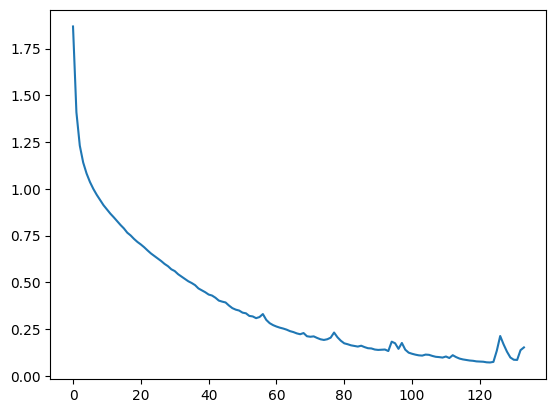

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100,39)),
    tf.keras.layers.Masking(mask_value=2),
    tf.keras.layers.SimpleRNN(39),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()
Results(model)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_12 (Masking)        (None, 100, 39)           0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 100, 39)           3081      
                                                                 
 dropout_2 (Dropout)         (None, 100, 39)           0         
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 39)                3081      
                                                                 
 flatten_12 (Flatten)        (None, 39)                0         
                                                                 
 dense_12 (Dense)            (None, 5)                 200       
                                                                 
Total params: 6,362
Trainable params: 6,362
Non-train

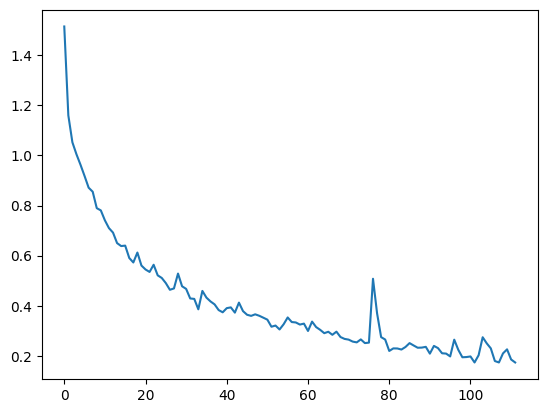

In [30]:
# Architecture - 2
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100,39)),
    tf.keras.layers.Masking(mask_value=2),
    tf.keras.layers.SimpleRNN(39,return_sequences=True),
    tf.keras.layers.SimpleRNN(39),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()
Results(model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_4 (Masking)         (None, 100, 39)           0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 100, 78)           9204      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 39)                4602      
                                                                 
 flatten_4 (Flatten)         (None, 39)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 200       
                                                                 
Total params: 14,006
Trainable params: 14,006
Non-trainable params: 0
_________________________________________________________________
35/35 [==============================] - 1s 20ms/s

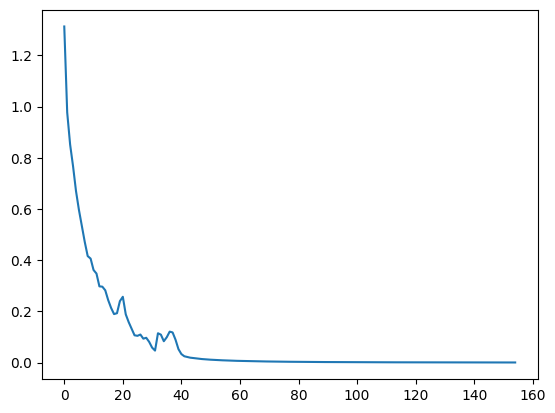

In [22]:
# Architecture - 3
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100,39)),
    tf.keras.layers.Masking(mask_value=2),
    tf.keras.layers.SimpleRNN(78,return_sequences=True),
    tf.keras.layers.SimpleRNN(39),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()
Results(model)

In [32]:
Predict = model.predict(Test_Padded, verbose=0)
predictions = np.argmax(Predict, axis=1)
cm = tf.math.confusion_matrix(Test_Label, predictions)
print(cm)

tf.Tensor(
[[44  2  1 22  3]
 [ 3 46  0  0  0]
 [ 0  1 44  0  7]
 [25  1  0 27  0]
 [ 0  0  2  5 45]], shape=(5, 5), dtype=int32)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_5 (Masking)         (None, 100, 39)           0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 100, 78)           9204      
                                                                 
 dropout (Dropout)           (None, 100, 78)           0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 39)                4602      
                                                                 
 flatten_5 (Flatten)         (None, 39)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 200       
                                                                 
Total params: 14,006
Trainable params: 14,006
Non-trai

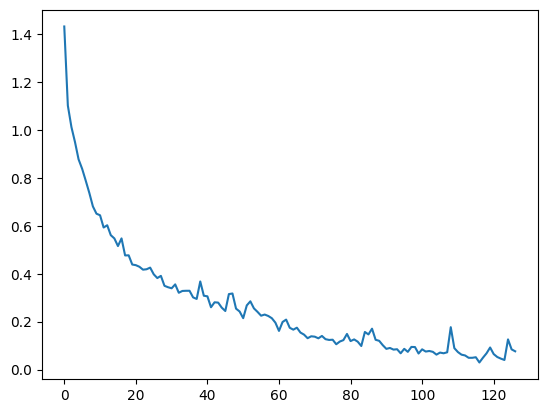

In [23]:
# Architecture - 4
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100,39)),
    tf.keras.layers.Masking(mask_value=2),
    tf.keras.layers.SimpleRNN(78,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.SimpleRNN(39),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()
Results(model)

# LSTM
Architecture - 1

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_6 (Masking)         (None, 100, 39)           0         
                                                                 
 lstm (LSTM)                 (None, 39)                12324     
                                                                 
 flatten_6 (Flatten)         (None, 39)                0         
                                                                 
 dense_6 (Dense)             (None, 5)                 200       
                                                                 
Total params: 12,524
Trainable params: 12,524
Non-trainable params: 0
_________________________________________________________________
35/35 [==============================] - 2s 18ms/step - loss: 0.0098 - accuracy: 1.0000
[0.009810494258999825, 1.0]
9/9 [==============================] - 0s 19ms/step - loss: 0.5372

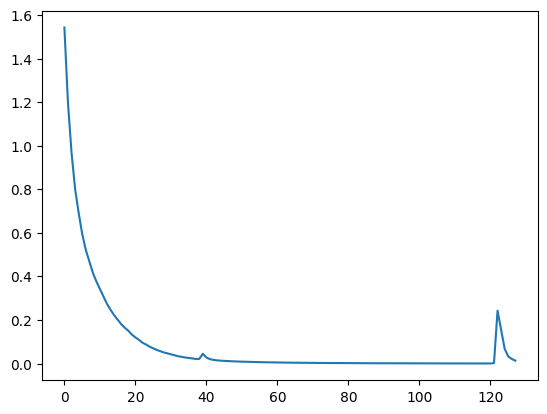

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100,39)),
    tf.keras.layers.Masking(mask_value=2),
    tf.keras.layers.LSTM(39),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()
Results(model)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_8 (Masking)         (None, 100, 39)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 39)           12324     
                                                                 
 lstm_4 (LSTM)               (None, 39)                12324     
                                                                 
 flatten_8 (Flatten)         (None, 39)                0         
                                                                 
 dense_8 (Dense)             (None, 5)                 200       
                                                                 
Total params: 24,848
Trainable params: 24,848
Non-trainable params: 0
_________________________________________________________________
35/35 [==============================] - 4s 33ms/s

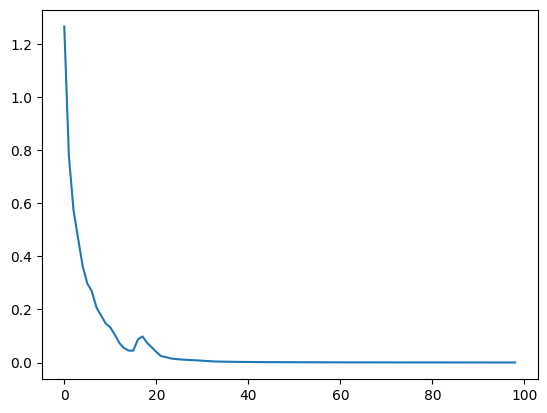

In [26]:
# Architecture - 2
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100,39)),
    tf.keras.layers.Masking(mask_value=2),
    tf.keras.layers.LSTM(39,return_sequences=True),
    tf.keras.layers.LSTM(39),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()
Results(model)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_9 (Masking)         (None, 100, 39)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 78)           36816     
                                                                 
 lstm_6 (LSTM)               (None, 39)                18408     
                                                                 
 flatten_9 (Flatten)         (None, 39)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                 200       
                                                                 
Total params: 55,424
Trainable params: 55,424
Non-trainable params: 0
_________________________________________________________________
35/35 [==============================] - 6s 43ms/s

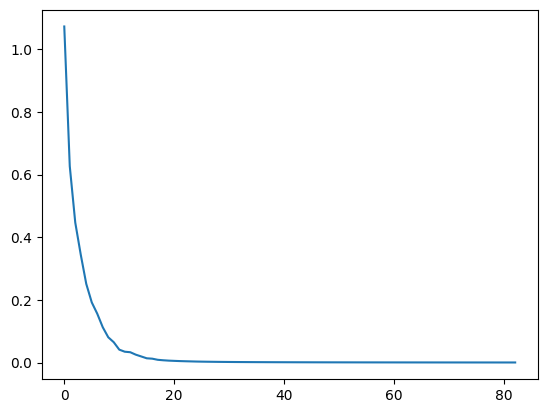

In [27]:
# Architecture - 3
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100,39)),
    tf.keras.layers.Masking(mask_value=2),
    tf.keras.layers.LSTM(78,return_sequences=True),
    tf.keras.layers.LSTM(39),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()
Results(model)

In [33]:
Predict = model.predict(Test_Padded, verbose=0)
predictions = np.argmax(Predict, axis=1)
cm = tf.math.confusion_matrix(Test_Label, predictions)
print(cm)

tf.Tensor(
[[44  2  1 22  3]
 [ 3 46  0  0  0]
 [ 0  1 44  0  7]
 [25  1  0 27  0]
 [ 0  0  2  5 45]], shape=(5, 5), dtype=int32)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_10 (Masking)        (None, 100, 39)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 78)           36816     
                                                                 
 dropout_1 (Dropout)         (None, 100, 78)           0         
                                                                 
 lstm_8 (LSTM)               (None, 39)                18408     
                                                                 
 flatten_10 (Flatten)        (None, 39)                0         
                                                                 
 dense_10 (Dense)            (None, 5)                 200       
                                                                 
Total params: 55,424
Trainable params: 55,424
Non-tra

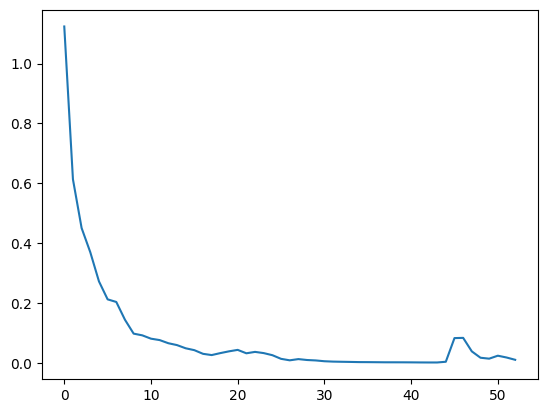

In [28]:
# Architecture - 4
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100,39)),
    tf.keras.layers.Masking(mask_value=2),
    tf.keras.layers.LSTM(78,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(39),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()
Results(model)